knapsack

Maximizar el valor llevado para un cierto peso maximo. Nos dan ciertos objetos con su peso y su valor, queremos maximizar el valor llevado para un cierto peso maximo. 
En este caso, consideramos el knapsack discreto, es decir, no podemos llevar pedazos de un objeto sino s'olo el objeto completo o nada. En este caso, la soluci'on greedy de antes de tomar el objeto mas denso no sirve. Se puede hacer el problema con repeticion (se puede llevar mas de una copia de un objeto) o sin repeticion. 

knapsack con repeticion

Nos dan pesos w1, ... , wn y valores v1, ... , vn para una mochila con peso W. Encontrar qu'e objetos nos conviente llevar. 

Digamos que ya tenemos una soluci'on de objetos con un peso de a lo mucho W y que incluye el objeto wi. Entonces, al quitar el objeto wi, vamos a tener una solucion optima para el problema del knapsack de peso maximo W-wi  (es el mismo problema porque se valen las repeticiones)  (tiene que ser optima porque si hay una forma mas optima de un knapsack W-wi, eso contradice que nuestra solucion para W es optima.  Entonces, claramente
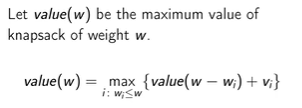

Es decir, hay que tomar en cuenta que si value(w) es optimo, entonces cada value(w-wi) es optima. Y nuestro knapsack se puede ver como value (w) = value(w-wi) + vi, por lo que hay que ver el mejor de estos valores

In [7]:

def knapsack(W,pesos,precio):
    #precio es el valor de cada objeto
    
    n = len(pesos)
    #value es el valor optimo que podemos llevar en una mochila con peso w
    # por ahora los valores son 0
    value=[]
    
    # vamos a ir llenando cada valor value[w]
    for w in range(W+1):
        #lo inicializamos como value[w] =0
        value.append(0)
        
        # vamos viendo todos los knapsacks anteriores posibles llenados
        #optimamente
        for i in range(n):
            # si podemos sacar un peso wi
            if pesos[i] <= w:
                #vemos cual es la solucion optima de un knapsack w-wi
                # y le sumamos precio_i
                #vemos cual es la mejor de todas las opciones
                val = value[w-pesos[i]] + precio[i]
                if val > value[w]:
                    value[w] = val
    return(value)

#Es decir, para construir una knapsack optima de peso w, podemos empezar
# con una kanpsack de peso w-w1 optima y sumarle v1. O empezar con una
# w-w2 optima y sumar v2 o ... etc
    
print(knapsack(10,[6,3,4,2], [30,14,16,9]))

#tiene un tiempo O(nW)
    

[0, 0, 9, 14, 18, 23, 30, 32, 39, 44, 48]


Knapsack sin repeticion

Nuestro algoritmo anterior no funciona, porque al sacar un peso wi, el problema que queda no es equivalente al original.

Si empezamos con una solucion optima de peso W que contiene a wn, entonces al quitar el wn, nos queda una knapsack de peso maximo W-wn y con los elementos w1,...,wn-1 y hay que solucionar dicho problema

Si la solucion del problema para peso W no contiene el peso wn, entonces se resuelve como un subproblema de peso W pero con pesos w1,...,wn-1

In [69]:
# Para 0 <= w <= W y 0<= i <= n, definimos value(w,i) como el maximo
# valor optimo de un knapsack de peso w con elementos 1,2,3,...,i. 
# queremos resolver value(W,n)
# Sabemos que hay dos opciones para el knapsack de peso W, o tiene a wn o no. 
# Si tiene a wn, entonces el valor optimo value(W,n) se ve como 
# la solucion optima para el knapsack de n-1 elementos sin wn mas el vn, es 
# decir value(W,n) = value(W-wn,n-1) + vn es el optimo. 
# Si la solucion optimoa de W no tiene a wn, entonces es equivalente a la sol. 
# optima de peso W pero sin considerar a wn. Es decir
# value(W,n) = value(W,n-1)

#Para saber en qu'e caso nos encontramos, tenemos que ver estas dos posibilidades
# Y ver cual es mas optima.
# Para ver cual es mas optima, hay que fijarnos en los dos valores 
#value(W-wn,n-1) + vn y en value(W,n-1). Para ello, vamos construyendo 
# de abajo hacia arriba. 


import numpy as np
#w contiene los pesos y v los valores
def knapsack(W, w,v):
    n = len(w)
    #inicializamos todo a 0 en la matriz de valores
    value = np.zeros((n+1,W+1))
    
    for i in range(1,n+1):
        for j in range(1,W+1):
            #le ponemos la solucion que seria en el caso de  
            # que la solucion optima a w no usa el objeto i-esimo 
            value[i,j] = value[i-1,j]
            
            # vemos si la solucion que si usa wi es mejor
            if w[i-1] <= j:
                val = value[i-1,j-w[i-1]] + v[i-1]
                
                # si es una mejora, la ponemos
                if value[i,j] < val:
                    value[i,j] = val
    return(value)
    

print(knapsack(10,[6,3,4,2,5], [30,14,16,9,10]))
value= knapsack(10,[6,3,4,2,5], [30,14,16,9,10])

#podemos ahora reconstruir el valor inicial. 

def reconstruir(value, W, w,v):
    # res va a tener res[i] = 1 si se uso el  i-esimo elemento en el knapsack
    n = len(w)
    res = n * [0]
    
    
    
    #empezamos en el ultimo elemento de value
    i = n
    j = W
    
    
    while i > 0 and j >0:
        #vemos cual de las dos opciones para llegar a este valor fue la optima
        # ya sea no usar el elemento i esimo o s'i usarlo
        #pero hay que tomar en cuenta que j-w[i-1] tenga sentido
        if j-w[i-1]>=0:
            val = max(value[i-1,j], value[i-1,j-w[i-1]] + v[i-1] )
        
            # si el valor se obtuvo sin el ultimo elemento
            if val == value[i-1,j]:
                # ponemos que el ultimo elemento no se us'o
                res[i-1] = 0
                i = i-1
                
            elif j-w[i-1] >=0:
                # ponemos que el ultimo elemento si se us'o y la j baja.
                res[i-1] = 1
                j = j-w[i-1]
                i = i-1
            
        else:
            # ponemos que el ultimo elemento no se us'o
            res[i-1] = 0
            i = i-1
            

    return(res)
        
print(reconstruir(value, 10,[6,3,4,2,5], [30,14,16,9,10] ))   





[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 30. 30. 30. 30. 30.]
 [ 0.  0.  0. 14. 14. 14. 30. 30. 30. 44. 44.]
 [ 0.  0.  0. 14. 16. 16. 30. 30. 30. 44. 46.]
 [ 0.  0.  9. 14. 16. 23. 30. 30. 39. 44. 46.]
 [ 0.  0.  9. 14. 16. 23. 30. 30. 39. 44. 46.]]
[1, 0, 1, 0, 0]


Placing parenthesis

Tenemos alguna expresion aritmetica y nos preguntamos de que forma podemos colocar parentesis tal que el resultado final sea maximizado. 

Subproblemas: 

Tenemos una secuencia de digitos d1, ... , dn y una secuencia de operaciones op1, op2, ... , opn-1 \in {+,x,-}. Queremos poner parentesis de tal forma de maximizar d1 op1 d2 op2 ... opn-1 dn 
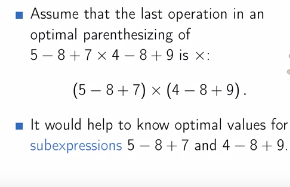
Sin embargo, como hay restas, nos conviene tambien conocer el valor minimo de las subexpresiones. 

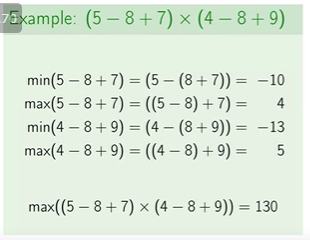

Definimos Eij comoo la subexpresion di opi ... opj-1 dj.Y definimos M(i,j) , m(i,j) como el max y min de Eij respectivamente. Entonces, para obtener M(i,j) hay que fijarnos en todas las posibles formas de partir M(i,j) en algo opk algo y sacar el maximo
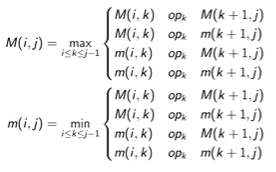

1. Maximum amount of gold

Nos dan W el peso max de la mochila y n la cantidad de barras de oro que hay en un banco. Luego nos dan los pesos w1,...,wn. Buscamos cual es el peso maximo que podemos cargar si sólo podemos llevar una barra de cada peso. 

In [72]:
#Es b'asicamente un knapsack sin repetici'on en el que todas las barras valen 
#lo que pesan

# Para 0 <= w <= W y 0<= i <= n, definimos value(w,i) como el maximo
# valor optimo de un knapsack de peso w con elementos 1,2,3,...,i. 
# queremos resolver value(W,n)
# Sabemos que hay dos opciones para el knapsack de peso W, o tiene a wn o no. 
# Si tiene a wn, entonces el valor optimo value(W,n) se ve como 
# la solucion optima para el knapsack de n-1 elementos sin wn mas el vn, es 
# decir value(W,n) = value(W-wn,n-1) + vn es el optimo. 
# Si la solucion optimoa de W no tiene a wn, entonces es equivalente a la sol. 
# optima de peso W pero sin considerar a wn. Es decir
# value(W,n) = value(W,n-1)

#Para saber en qu'e caso nos encontramos, tenemos que ver estas dos posibilidades
# Y ver cual es mas optima.
# Para ver cual es mas optima, hay que fijarnos en los dos valores 
#value(W-wn,n-1) + vn y en value(W,n-1). Para ello, vamos construyendo 
# de abajo hacia arriba. 


import numpy as np
#w contiene los pesos y v los valores
def knapsack(W, w,v):
    n = len(w)
    #inicializamos todo a 0 en la matriz de valores
    value = np.zeros((n+1,W+1))
    
    for i in range(1,n+1):
        for j in range(1,W+1):
            #le ponemos la solucion que seria en el caso de  
            # que la solucion optima a w no usa el objeto i-esimo 
            value[i,j] = value[i-1,j]
            
            # vemos si la solucion que si usa wi es mejor
            if w[i-1] <= j:
                val = value[i-1,j-w[i-1]] + v[i-1]
                
                # si es una mejora, la ponemos
                if value[i,j] < val:
                    value[i,j] = val
    return(value)
    


#podemos ahora reconstruir el valor inicial. 

def reconstruir(value, W, w,v):
    # res va a tener res[i] = 1 si se uso el  i-esimo elemento en el knapsack
    n = len(w)
    res = n * [0]
    
    
    
    #empezamos en el ultimo elemento de value
    i = n
    j = W
    
    
    while i > 0 and j >0:
        #vemos cual de las dos opciones para llegar a este valor fue la optima
        # ya sea no usar el elemento i esimo o s'i usarlo
        #pero hay que tomar en cuenta que j-w[i-1] tenga sentido
        if j-w[i-1]>=0:
            val = max(value[i-1,j], value[i-1,j-w[i-1]] + v[i-1] )
        
            # si el valor se obtuvo sin el ultimo elemento
            if val == value[i-1,j]:
                # ponemos que el ultimo elemento no se us'o
                res[i-1] = 0
                i = i-1
                
            elif j-w[i-1] >=0:
                # ponemos que el ultimo elemento si se us'o y la j baja.
                res[i-1] = 1
                j = j-w[i-1]
                i = i-1
            
        else:
            # ponemos que el ultimo elemento no se us'o
            res[i-1] = 0
            i = i-1
            

    return(res)
        
W, n = [int(x) for x in input().split()]

w = [int(x) for x in input().split()]
v = w
value= knapsack(W,w,v)
print(value)
print(value[-1][-1])
print(reconstruir(value, W,w,v))



100 9
12 9 13 4 8 17 22 14 21
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...  12.  12.  12.]
 [  0.   0.   0. ...  21.  21.  21.]
 ...
 [  0.   0.   0. ...  85.  85.  85.]
 [  0.   0.   0. ...  95.  99.  99.]
 [  0.   0.   0. ...  98.  99. 100.]]
[0, 1, 1, 1, 0, 1, 1, 1, 1]


Partitioning Souvenirs

In [26]:
# Nos dan un nuero n y luego n valores de los souvenirs v1,v2,...,vn
# Necesitamos encontrar si se puede particionar los souvenirs en tres grupos
# con la misma suma de valores

#basicamente es como el problema del oro 


n = int(input()) 
w = [int(x) for x in input().split()]
v=w

Wtot = sum(w)


#necesitamos ver primero si se puede llenar una mochila con peso W = Wtot/3
#es decir, si se puede formar un subconjunto del peso que necesitamos. 

#bueno, primero vemos si el valor total de los souvenirs es divisible por 3

if Wtot % 3 != 0:
    print("\n")
    print(0)
    print("omitir el resto")
    
W = int(Wtot//3) 


import numpy as np
#w contiene los pesos y v los valores
def knapsack(W, w,v):
    n = len(w)
    #inicializamos todo a 0 en la matriz de valores
    value = np.zeros((n+1,W+1))
    
    for i in range(1,n+1):
        for j in range(1,W+1):
            #le ponemos la solucion que seria en el caso de  
            # que la solucion optima a w no usa el objeto i-esimo 
            value[i,j] = value[i-1,j]
            
            # vemos si la solucion que si usa wi es mejor
            if w[i-1] <= j:
                val = value[i-1,j-w[i-1]] + v[i-1]
                
                # si es una mejora, la ponemos
                if value[i,j] < val:
                    value[i,j] = val
    return(value)
    


#podemos ahora reconstruir el valor inicial. 

def reconstruir(value, W, w,v):
    # res va a tener res[i] = 1 si se uso el  i-esimo elemento en el knapsack
    n = len(w)
    res = n * [0]
    
    
    
    #empezamos en el ultimo elemento de value
    i = n
    j = W
    
    
    while i > 0 and j >0:
        #vemos cual de las dos opciones para llegar a este valor fue la optima
        # ya sea no usar el elemento i esimo o s'i usarlo
        #pero hay que tomar en cuenta que j-w[i-1] tenga sentido
        if j-w[i-1]>=0:
            val = max(value[i-1,j], value[i-1,j-w[i-1]] + v[i-1] )
        
            # si el valor se obtuvo sin el ultimo elemento
            if val == value[i-1,j]:
                # ponemos que el ultimo elemento no se us'o
                res[i-1] = 0
                i = i-1
                
            elif j-w[i-1] >=0:
                # ponemos que el ultimo elemento si se us'o y la j baja.
                res[i-1] = 1
                j = j-w[i-1]
                i = i-1
            
        else:
            # ponemos que el ultimo elemento no se us'o
            res[i-1] = 0
            i = i-1
            

    return(res)
        
#vemos si se puede formar un knapsack de peso W = Wtot/3

value= knapsack(W,w,v)
vall  = value[-1][-1]
print("\n")
print("valor de la primera mochila: ",vall)

if vall != W:
    print("\n")
    print(0)
    print("ignorar el resto")

#estos son los elementos usados
usados1 = reconstruir(value, W,w,v)
print("Elementos escogidos en mochila 1: ",usados1)

#les quitamos el peso a los elementos ya usados
for i in range(len(usados1)):
    if usados1[i] == 1:
        w[i] = 0
        v[i] = 0
print("nuevos pesos:" , w)

#eliminamos los elementos que ya usamos de w y de v


#ahora vemos si se puede conseguir una mochila de peso W = Wtot/3 con lo que qda

value= knapsack(W,w,v)
vall  = value[-1][-1]
print(vall)

if vall != W:
    print("\n")
    print(0)
    print("ignorar el resto")

#estos son los elementos usados
usados2 = reconstruir(value, W,w,v)


for i in range(len(usados2)):
    if usados2[i]==1:
        usados2[i] = 2
print("usados en la mochila 2:" , usados2)
#les quitamos el peso a los elementos ya usados
for i in range(len(usados)):
    if usados2[i] == 2:
        w[i] = 0
        v[i] = 0
        
# si no hemos llegado a ningun ignorar, entonces si se pudo

print(1)




4
3 3 3 3


valor de la primera mochila:  3.0


0
ignorar el resto
Elementos escogidos en mochila 1:  [1, 0, 0, 0]
nuevos pesos: [0, 3, 3, 3]
3.0


0
ignorar el resto
usados en la mochila 2: [0, 2, 0, 0]
1
